# IO

In [1]:
import PineBioML.IO as IO

In [2]:
# Path
input_folder = "./input/"
output_folder = "./output/"
export_title = "example_basic "

##### Read data method 1: read single file
##### index_col is the column of index of samples (or sample name).
##### If your data do not have such column, please set index_col=None
data = IO.read_file(input_folder+ "example_data.xlsx", index_col=0)

##### pick the target label column
y = data["y"]

##### drop the target from dataframe, using the remaining to predict y (the target)
x = data.drop("y", axis = 1)

In [3]:
##### Read data method 1: read single file
##### index_col is the column of index of samples (or sample name).
##### If your data do not have such column, please set index_col=None
data = IO.read_file(input_folder+ "HAPTdata.csv", index_col=None)

##### pick the target label column
y = data["target"]

##### drop the target from dataframe, using the remaining to predict y (the target)
x = data.drop("target", axis = 1)

# Train test split

In [4]:
from sklearn.model_selection import train_test_split
x_train, x_valid, y_train, y_valid = train_test_split(x, y, test_size=0.33, random_state=142, shuffle=True)

# Data Overview

In [5]:
from PineBioML.report.utils import data_overview
data_overview(x_train, y_train, show_fig = False)

start PCA
start UMAP
 PCA Scatter plot


<Figure size 640x480 with 0 Axes>

<Figure size 1215.12x1000 with 0 Axes>

# Modeling

In [6]:
from PineBioML.preprocessing import Normalizer
from PineBioML.preprocessing import impute
from PineBioML.selection.ensemble import selector
import PineBioML.model.supervised.Classification as tuner

from sklearn.pipeline import Pipeline

In [7]:
pipe = Pipeline(
    [
        ("Standarization", Normalizer(method="StandardScaler")),
        ("Missing_Value_Processing", impute.simple_imputer(threshold = 0.6, strategy = "constant")),
        #("Feature_Selection", selector(z_importance_threshold = 1)),
        ("Modeling", tuner.RandomForest_tuner(target="qwk"))
     ]
)

In [8]:
pipe.fit(x_train, y_train)

optuna seed 71  |  validation seed 15403  |  model seed 997
    start tuning. it will take a while.
    default is better.


Pipeline(steps=[('Standarization',
                 <PineBioML.preprocessing.Normalizer object at 0x000002A49BB38D00>),
                ('Missing_Value_Processing',
                 <PineBioML.preprocessing.impute.simple_imputer object at 0x000002A49BB45940>),
                ('Modeling',
                 <PineBioML.model.supervised.Classification.RandomForest_tuner object at 0x000002A49BB45B80>)])

# Evaluation


 
                    precision    recall  f1-score   support

            LAYING       1.00      0.99      1.00       179
        LIE_TO_SIT       0.43      0.27      0.33        11
      LIE_TO_STAND       0.40      0.50      0.44        12
           SITTING       0.95      0.99      0.97       151
        SIT_TO_LIE       0.67      0.40      0.50        10
      SIT_TO_STAND       1.00      0.33      0.50         6
          STANDING       0.99      0.96      0.98       183
      STAND_TO_LIE       0.62      0.79      0.70        19
      STAND_TO_SIT       0.67      0.40      0.50        15
           WALKING       0.98      0.99      0.99       172
WALKING_DOWNSTAIRS       0.99      0.96      0.98       128
  WALKING_UPSTAIRS       0.93      0.99      0.96       158

          accuracy                           0.95      1044
         macro avg       0.80      0.72      0.74      1044
      weighted avg       0.95      0.95      0.95      1044



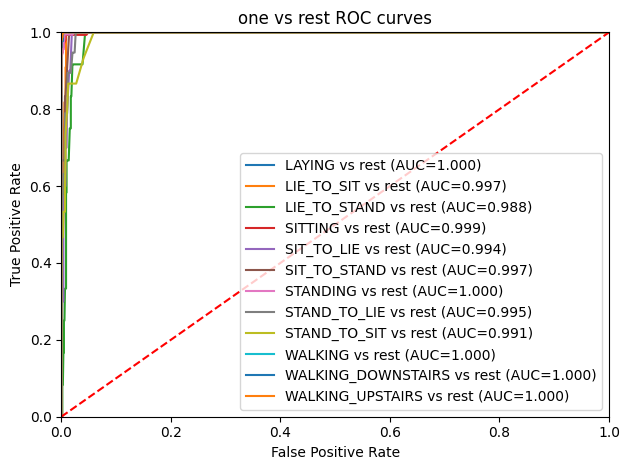

In [9]:
from PineBioML.report.utils import classification_summary

classification_summary(y_valid, pipe.predict_proba(x_valid))

# Saving Model

In [10]:
# save model
IO.save_model(pipe, output_folder+"models/", export_title+"MostInOne", overide=True)

# Reload model

# load model
presaved_model = IO.load_model(output_folder+"models/", export_title+"MostInOne")

# prediction
presaved_model.predict(x_valid)

classification_summary(y_valid, presaved_model.predict_proba(x_valid)[:, 1]) 